In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/cloudy'

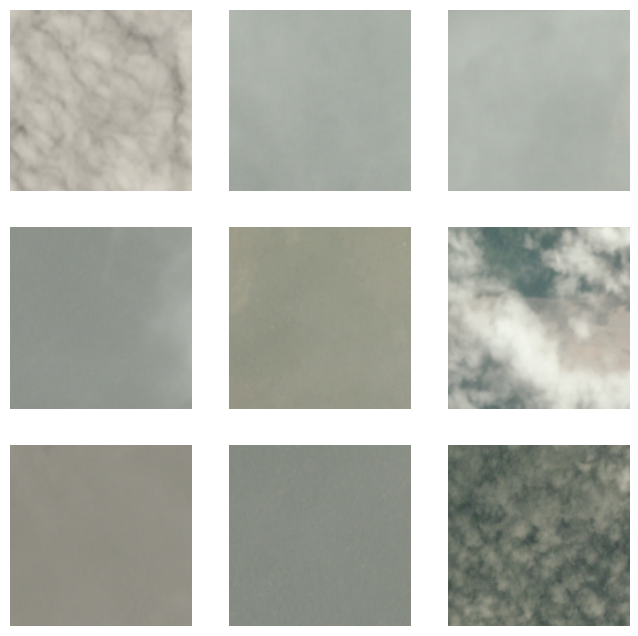

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


# Step 2: Set the dataset folder path
dataset_path = "/content/drive/MyDrive/cloudy"  # Change this to your dataset location

# Function to display images from the folder
def display_images_from_drive(directory, num_images=9):
    image_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))

    if len(image_files) == 0:
        print("No images found in the dataset folder.")
        return

    plt.figure(figsize=(8, 8))
    for i in range(min(num_images, len(image_files))):
        img = cv2.imread(image_files[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for Matplotlib
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis("off")

    plt.show()

# Step 3: Call function to display images
display_images_from_drive(dataset_path)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(input_shape=(64, 64, 3), num_classes=10):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        # Additional Convolutional and MaxPooling Layers
        Conv2D(256, (3, 3), activation='relu', padding='same'),  # New Layer
        MaxPooling2D((2, 2)),  # New Layer

        # You can continue adding more layers as needed

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_cnn_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 914,122 (3.49 MB)

 Trainable params: 914,122 (3.49 MB)

 Non-trainable params: 0 (0.00 B)

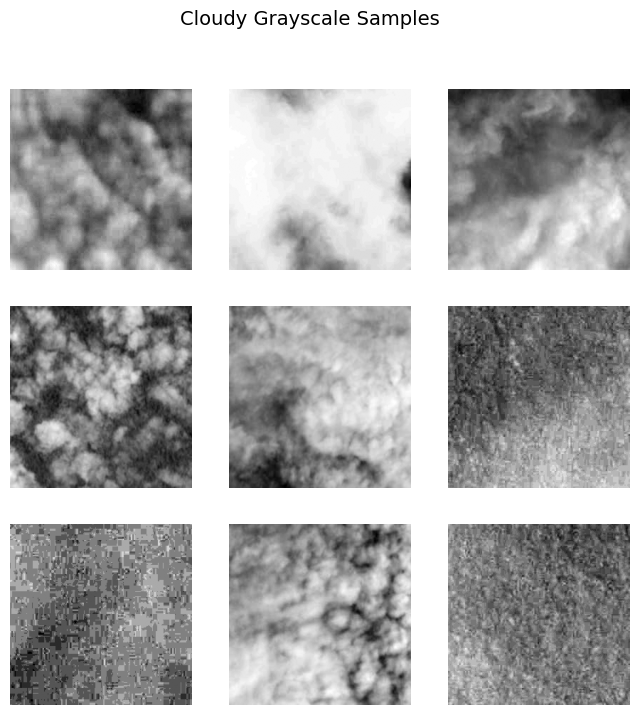

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Function to Display Grayscale Images
def display_grayscale_images(directory, num_images=9, title="Grayscale Dataset Samples"):
    image_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))

    if len(image_files) == 0:
        print(f"No images found in {title} folder.")
        return

    selected_images = np.random.choice(image_files, min(num_images, len(image_files)), replace=False)

    plt.figure(figsize=(8, 8))
    for i, img_path in enumerate(selected_images):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to Grayscale
        plt.subplot(3, 3, i + 1)
        plt.imshow(img, cmap="gray")  # Display in grayscale
        plt.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.show()

# 🎯 Define the train_path variable with the actual path to your training data:
train_path = "/content/drive/MyDrive/cloudy"  # Update with your actual path

# 🔹 Display Grayscale Images
display_grayscale_images(train_path, num_images=9, title="Cloudy Grayscale Samples")


Found 0 images belonging to 0 classes.


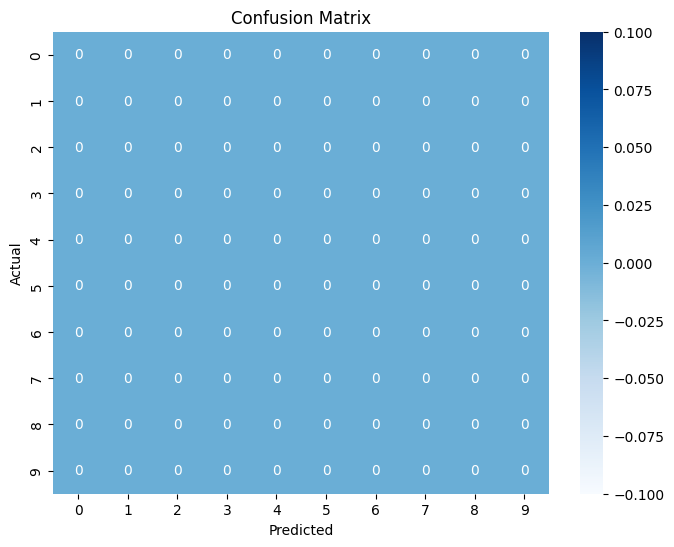

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths and parameters
val_path = "/content/drive/MyDrive/cloudy"  # Update with your validation data path
img_size = (64, 64)
batch_size = 32

# Create data generator
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',  # Use 'sparse' for integer labels
    shuffle=False
)

# Handle empty or incorrectly structured data
if val_generator.samples == 0:
    print(f"Warning: No images found in {val_path}. Check directory structure and ensure images are organized into subfolders for each class.")
    # Create a dummy confusion matrix to avoid errors
    num_classes = len(val_generator.class_indices)  # Get the number of classes from the generator
    if num_classes == 0:
        num_classes = 10  # Use a default if no classes are found
    cm = np.zeros((num_classes, num_classes), dtype=int)
else:
    # Predict on validation set
    y_pred = model.predict(val_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = val_generator.classes

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

# Get class labels (or create default labels)
class_labels = list(val_generator.class_indices.keys())
if not class_labels:
    class_labels = [str(i) for i in range(cm.shape[0])]  # Default labels if none found

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report and per-class/overall metrics only if predictions were made
if val_generator.samples > 0:
    print("Classification Report:")
    print(classification_report(y_true, y_pred_classes, labels=np.unique(y_true), target_names=class_labels, zero_division=0))

    # Compute per-class metrics
    precision = precision_score(y_true, y_pred_classes, average=None, zero_division=0)
    recall = recall_score(y_true, y_pred_classes, average=None, zero_division=0)
    f1 = f1_score(y_true, y_pred_classes, average=None, zero_division=0)

    for i, label in enumerate(class_labels):
        print(f"Class: {label}")
        print(f"Precision: {precision[i]:.4f}")
        print(f"Recall: {recall[i]:.4f}")
        print(f"F1-score: {f1[i]:.4f}")
        print("-" * 30)

    # Print overall metrics
    print("Overall Metrics:")
    print(f"Precision: {precision_score(y_true, y_pred_classes, average='weighted', zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred_classes, average='weighted', zero_division=0):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred_classes, average='weighted', zero_division=0):.4f}")

In [ ]:
import statsmodels.stats.weightstats as st

# Sample data (replace with your actual data)
sample_data = [10, 12, 11, 13, 10, 12, 14, 11, 12, 13]
population_mean = 12  # Hypothesized population mean

# Perform the one-sample z-test
z_statistic, p_value = st.ztest(sample_data, value=population_mean)

# Print the results
print("Z-statistic:", z_statistic)
print("P-value:", p_value)

Z-statistic: -0.4803844614152597
P-value: 0.630954041184172


In [ ]:
import scipy.stats as stats

# Sample data (replace with your actual data)
sample1 = [10, 12, 11, 13, 10, 12, 14, 11, 12, 13]
sample2 = [11, 13, 12, 14, 11, 13, 15, 12, 13, 14]

# Perform the independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -1.6984155512168935
P-value: 0.1066484282683786
